In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/Datasets/hotel_booking/hotel_booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [ ]:
df['company'].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

In [ ]:
df[['agent', 'company']]

,agent,company
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,304.0,NaN
4,240.0,NaN
...,...,...
119385,394.0,NaN
119386,9.0,NaN
119387,9.0,NaN
119388,89.0,NaN


#1. Data Cleaning

* **Missing Values:** Identify and handle missing values.

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [ ]:
#Drop Columns with High Percentage of Missing Values
df= df.drop(columns=['company'])

#Impute with a constant value (e.g., a placeholder like "unknown")
df['agent'].fillna('unknown', inplace=True)

# Drop rows with missing values
df = df.dropna()

#2. Exploratory Data Analysis (EDA)

#1 Time Series Analysis

* **Trend Analysis:** Examine long-term trends in bookings, cancellations, and revenue.

In [ ]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

# Extract year, month, and create a 'date' period for monthly trend analysis
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['date'] = df['reservation_status_date'].dt.to_period('M')

# Aggregate data by month
monthly_data = df.groupby('date').agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum'),
    total_revenue=('adr', 'sum')  # Assumes ADR (Average Daily Rate) represents revenue
).reset_index()

# Convert 'date' from Period to Timestamp for plotting
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()
monthly_data.set_index('date', inplace=True)

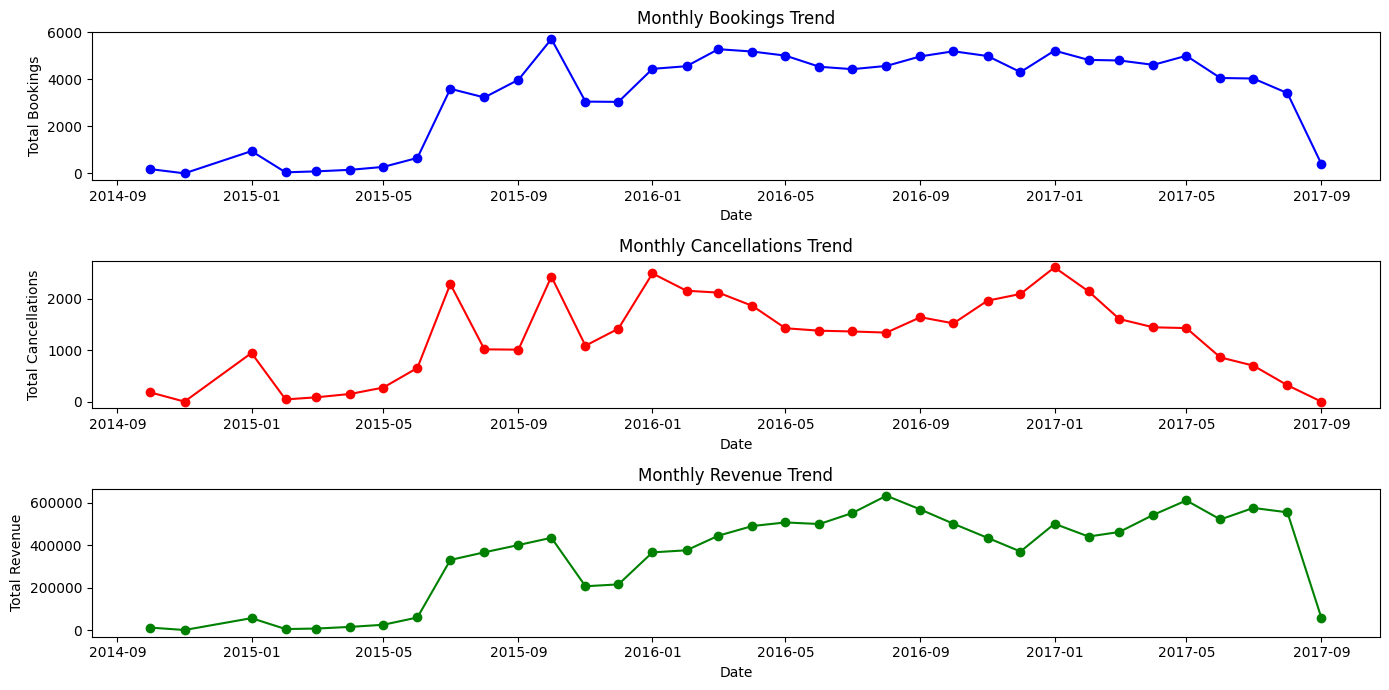

In [ ]:
# Plotting trends for bookings, cancellations, and revenue
plt.figure(figsize=(14, 7))

# Plot bookings trend
plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, monthly_data['total_bookings'], marker='o', color='b')
plt.title('Monthly Bookings Trend')
plt.xlabel('Date')
plt.ylabel('Total Bookings')

# Plot cancellations trend
plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, monthly_data['total_cancellations'], marker='o', color='r')
plt.title('Monthly Cancellations Trend')
plt.xlabel('Date')
plt.ylabel('Total Cancellations')

# Plot revenue trend
plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data['total_revenue'], marker='o', color='g')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

#2  Cancellations Analysis

* **Cancellation Rate:** Calculate the percentage of bookings that are canceled.

In [ ]:
# Calculate the total number of bookings
total_bookings = len(df)

# Calculate the number of canceled bookings
canceled_bookings = df['is_canceled'].sum()

# Calculate the cancellation rate
cancellation_rate = (canceled_bookings / total_bookings) * 100

# Print the cancellation rate
print(f'Cancellation Rate: {cancellation_rate:.2f}%')


Cancellation Rate: 37.14%


* **Cancellation by Lead Time:** Investigate if there's a correlation between lead time and cancellation rate.

In [ ]:
cancellation_by_lead_time = df.copy()

In [ ]:

# Define lead time bins
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300']

# Bin the lead times
cancellation_by_lead_time['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=True)

# Calculate the cancellation rate for each bin
cancellation_rate_by_bin = cancellation_by_lead_time.groupby('lead_time_bin')['is_canceled'].mean() * 100

# Reset index for plotting
cancellation_rate_by_bin = cancellation_rate_by_bin.reset_index()


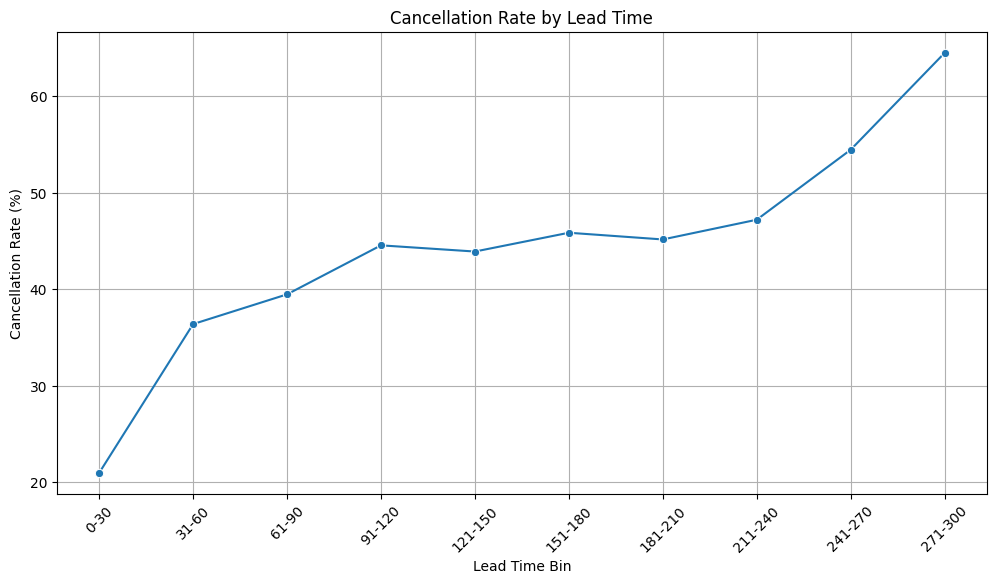

In [ ]:
#Plot the Data
plt.figure(figsize=(12, 6))
sns.lineplot(x='lead_time_bin', y='is_canceled', data=cancellation_rate_by_bin, marker='o')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time Bin')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


* **Cancellation by Country:** See if there are higher cancellation rates from specific countries.

In [ ]:
# Calculate the cancellation rate for each country
cancellation_rate_by_country = df.groupby('country')['is_canceled'].mean() * 100

# Reset index for plotting
cancellation_rate_by_country = cancellation_rate_by_country.reset_index()

# Sort by cancellation rate in descending order
cancellation_rate_by_country = cancellation_rate_by_country.sort_values(by='is_canceled', ascending=False)

# Optional: Filter out countries with very few bookings to avoid skewed results
# For example, keeping only countries with at least 100 bookings
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= 100].index
filtered_data = cancellation_rate_by_country[cancellation_rate_by_country['country'].isin(valid_countries)]


<ipython-input-52-fe06fbe37d80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_canceled', y='country', data=filtered_data, palette='viridis')


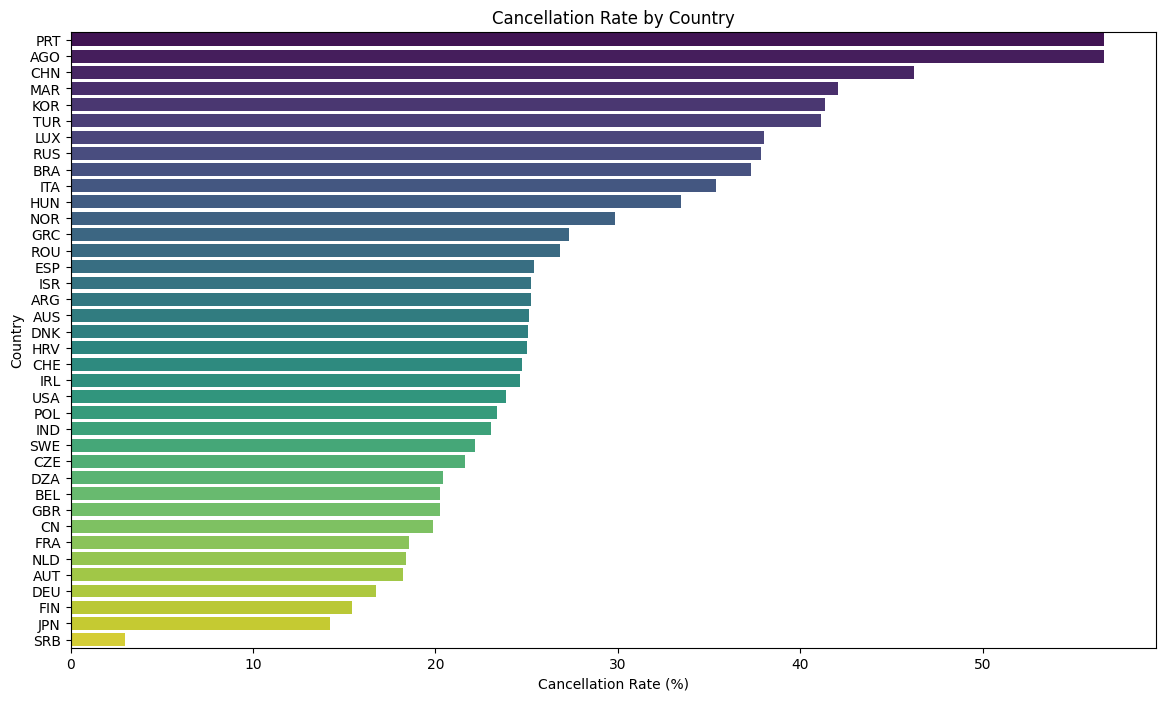

In [ ]:
#Bar Plot of Cancellation Rates by Country
plt.figure(figsize=(14, 8))
sns.barplot(x='is_canceled', y='country', data=filtered_data, palette='viridis')
plt.title('Cancellation Rate by Country')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Country')
plt.show()

* **Impact of Previous Cancellations:** Determine if guests with previous cancellations are more likely to cancel again.

In [ ]:
# Calculate the cancellation rate for each number of previous cancellations
cancellation_rate_by_previous_cancellations = df.groupby('previous_cancellations')['is_canceled'].mean() * 100

# Reset index for plotting
cancellation_rate_by_previous_cancellations = cancellation_rate_by_previous_cancellations.reset_index()

# Sort by number of previous cancellations
cancellation_rate_by_previous_cancellations = cancellation_rate_by_previous_cancellations.sort_values(by='previous_cancellations')

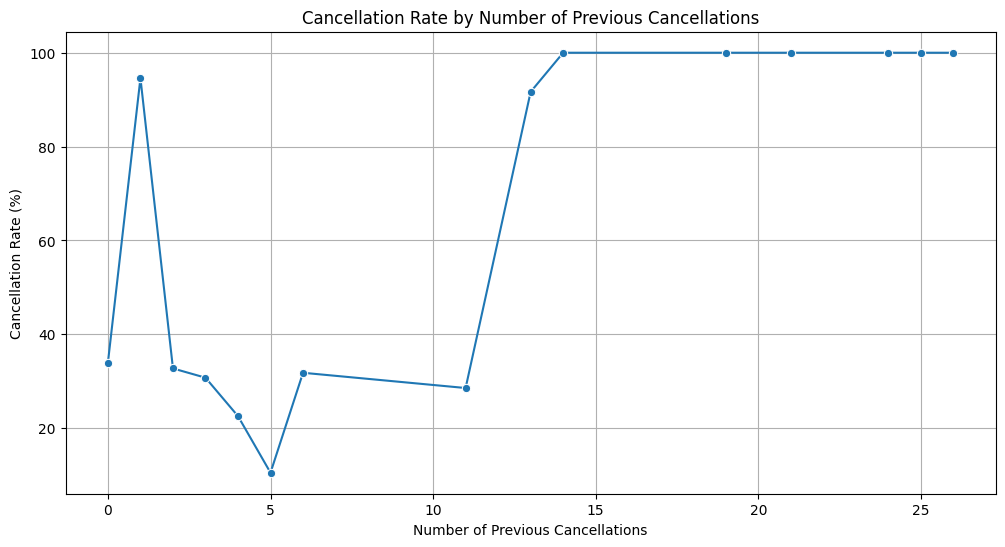

In [ ]:
#Line Plot of Cancellation Rates by Number of Previous Cancellations
plt.figure(figsize=(12, 6))
sns.lineplot(x='previous_cancellations', y='is_canceled', data=cancellation_rate_by_previous_cancellations, marker='o')
plt.title('Cancellation Rate by Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.show()

#3  Revenue Analysis

* **Average Daily Rate (ADR):** Analyze the distribution and trends of ADR.

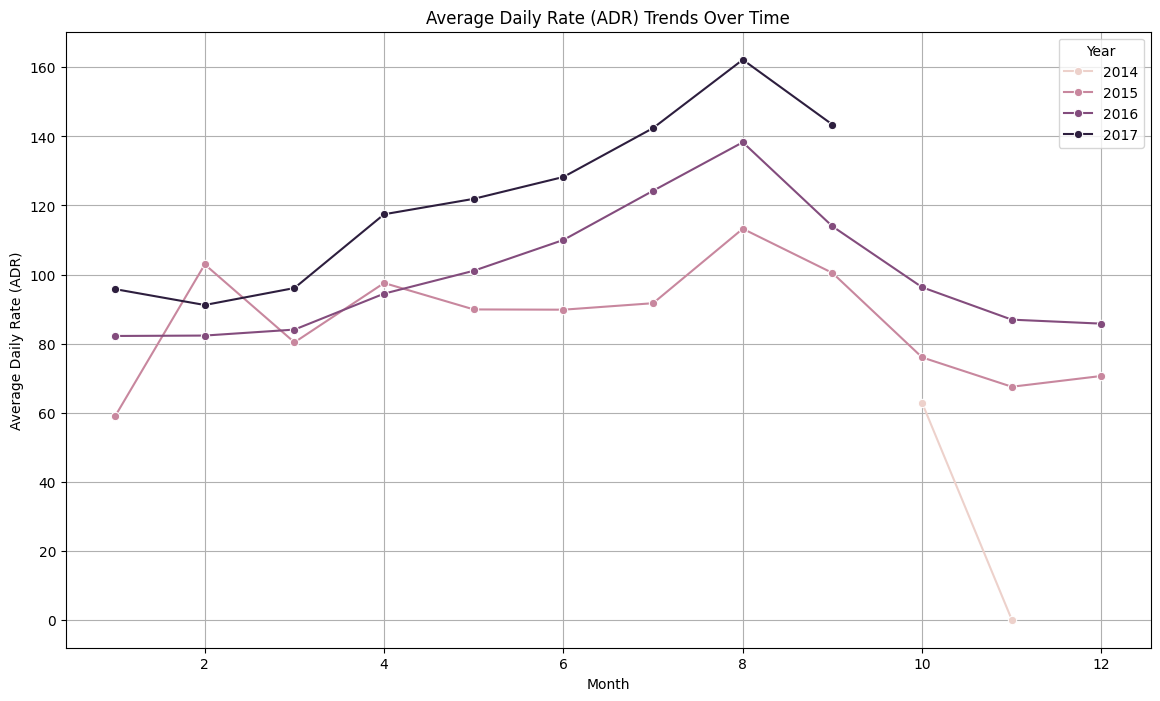

In [ ]:
#ADR Trends Over Time
# Ensure the 'reservation_status_date' is in datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract year and month for trend analysis
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month

# Aggregate ADR by year and month
adr_trend = df.groupby(['year', 'month'])['adr'].mean().reset_index()

# Plot ADR trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='adr', hue='year', data=adr_trend, marker='o')
plt.title('Average Daily Rate (ADR) Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
#Group by Hotel Type and Calculate the Average ADR
# Calculate the average ADR for each hotel type
adr_by_hotel_type = df.groupby('hotel')['adr'].mean().reset_index()

# Print the result
print(adr_by_hotel_type)


          hotel         adr
0    City Hotel  105.326470
1  Resort Hotel   95.347555


<ipython-input-65-5904e1f49c8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hotel', y='adr', data=adr_by_hotel_type, palette='viridis')


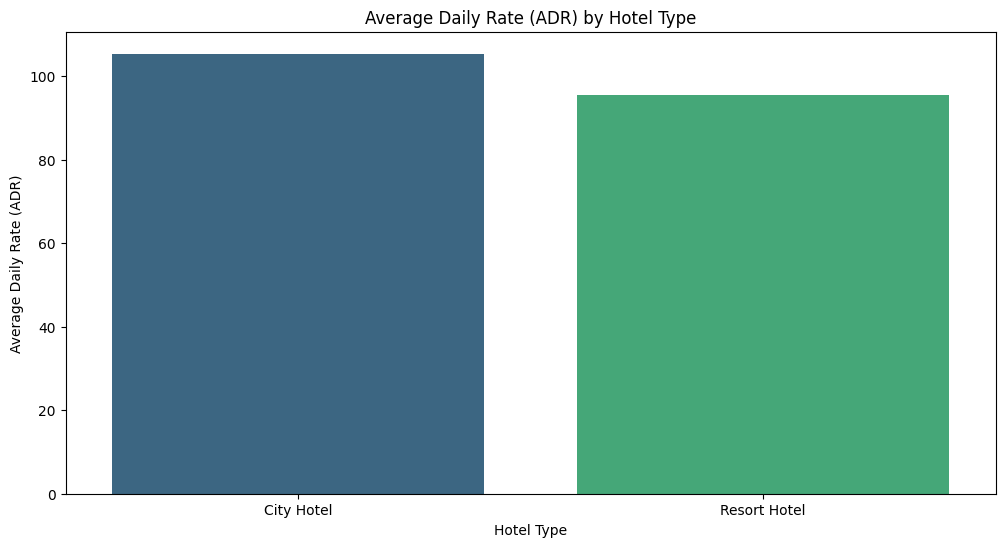

In [ ]:
#Bar Plot of ADR by Hotel Type
plt.figure(figsize=(12, 6))
sns.barplot(x='hotel', y='adr', data=adr_by_hotel_type, palette='viridis')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


In [ ]:
#Group by Booking Status and Calculate the Average ADR
# Calculate the average ADR for each booking status
adr_by_booking_status = df.groupby('reservation_status')['adr'].mean().reset_index()

# Print the result
print(adr_by_booking_status)

  reservation_status         adr
0           Canceled  105.279117
1          Check-Out  100.210618
2            No-Show   96.426268


<ipython-input-68-aaaf66e1dfde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reservation_status', y='adr', data=adr_by_booking_status, palette='viridis')


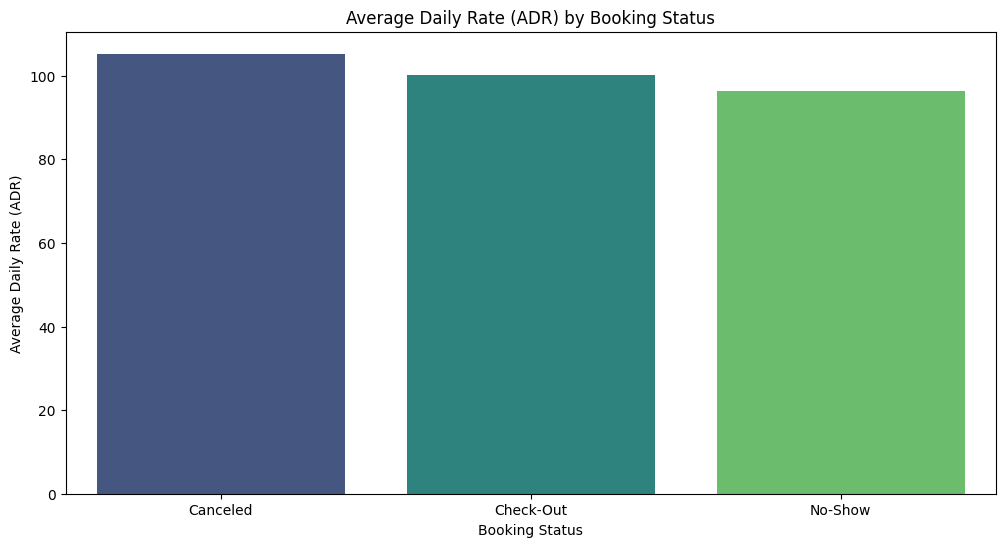

In [ ]:
#Bar Plot of ADR by Booking Status
plt.figure(figsize=(12, 6))
sns.barplot(x='reservation_status', y='adr', data=adr_by_booking_status, palette='viridis')
plt.title('Average Daily Rate (ADR) by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

* **Revenue by Segment:** Compare revenue across different market segments and distribution channels.

In [ ]:
# Calculate the total number of nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate the revenue for each booking
df['revenue'] = df['adr'] * df['total_nights']

# Display the first few rows to check the new columns
df[['hotel', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights', 'revenue']].head()

,hotel,adr,stays_in_weekend_nights,stays_in_week_nights,total_nights,revenue
0,Resort Hotel,0.0,0,0,0,0.0
1,Resort Hotel,0.0,0,0,0,0.0
2,Resort Hotel,75.0,0,1,1,75.0
3,Resort Hotel,75.0,0,1,1,75.0
4,Resort Hotel,98.0,0,2,2,196.0


In [ ]:
#Aggregate Revenue by Market Segment
# Sum the revenue by market segment
revenue_by_market_segment = df.groupby('market_segment')['revenue'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_market_segment = revenue_by_market_segment.sort_values(by='revenue', ascending=False)

# Print the result
print(revenue_by_market_segment)

  market_segment      revenue
6      Online TA  23922311.28
5  Offline TA/TO   8137124.24
3         Direct   5037517.18
4         Groups   4668206.74
2      Corporate    762514.16
0       Aviation     87446.36
1  Complementary      5082.52


<ipython-input-72-11471bec4407>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='market_segment', data=revenue_by_market_segment, palette='viridis')


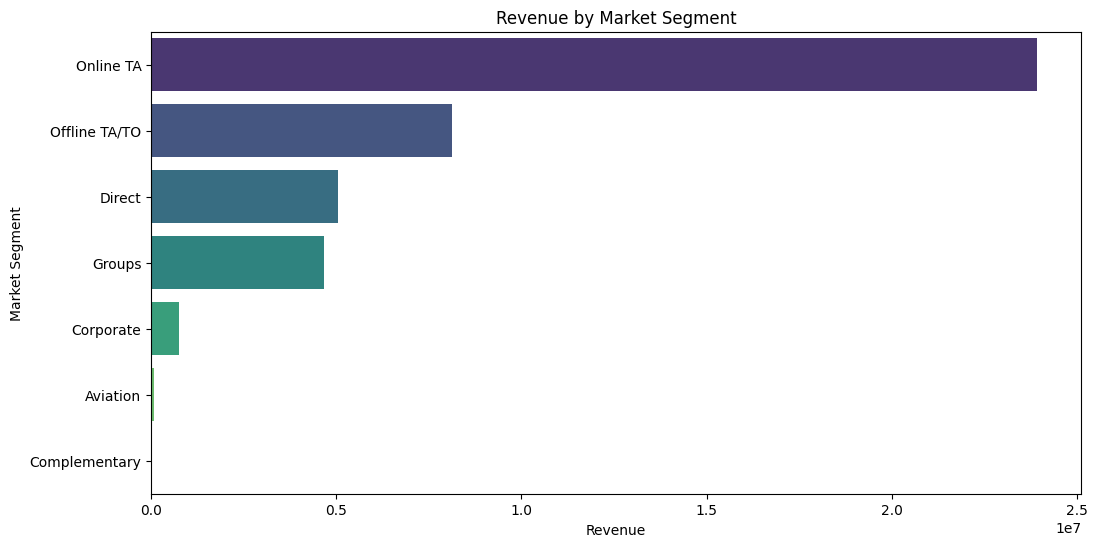

In [ ]:
#Bar Plot of Revenue by Market Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='market_segment', data=revenue_by_market_segment, palette='viridis')
plt.title('Revenue by Market Segment')
plt.xlabel('Revenue')
plt.ylabel('Market Segment')
plt.show()


In [ ]:
#Aggregate Revenue by Distribution Channel
# Sum the revenue by distribution channel
revenue_by_distribution_channel = df.groupby('distribution_channel')['revenue'].sum().reset_index()

# Sort by revenue in descending order
revenue_by_distribution_channel = revenue_by_distribution_channel.sort_values(by='revenue', ascending=False)

# Print the result
print(revenue_by_distribution_channel)

  distribution_channel      revenue
3                TA/TO  36061137.41
1               Direct   5409697.19
0            Corporate   1102806.96
2                  GDS     45997.42
4            Undefined       563.50


<ipython-input-76-21bc5034c7bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='distribution_channel', data=revenue_by_distribution_channel, palette='viridis')


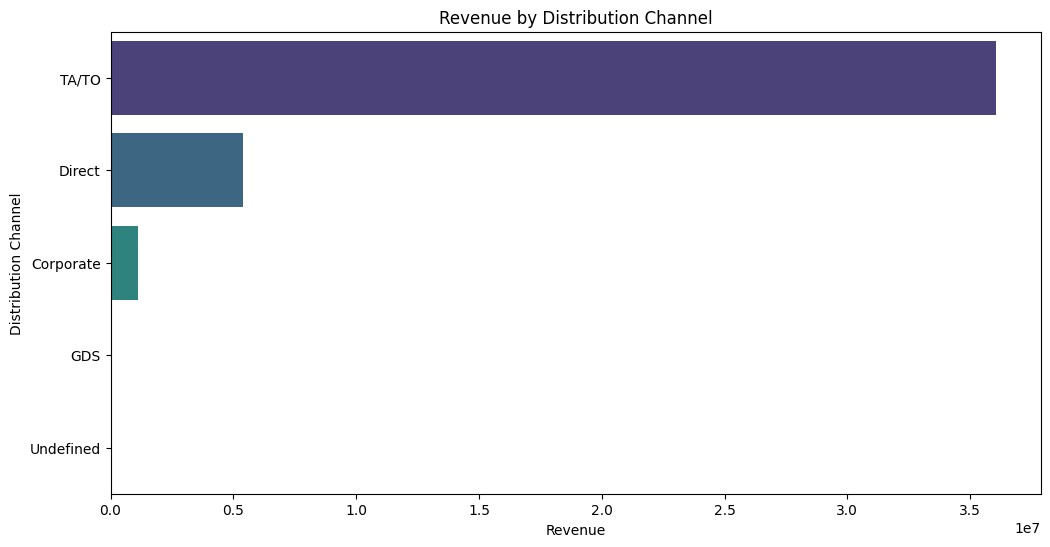

In [ ]:
#Bar Plot of Revenue by Distribution Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='distribution_channel', data=revenue_by_distribution_channel, palette='viridis')
plt.title('Revenue by Distribution Channel')
plt.xlabel('Revenue')
plt.ylabel('Distribution Channel')
plt.show()

#4 Guest Segmentation

* **Repeated Guests:** Study the characteristics and behavior of repeated guests.

In [ ]:
#Segment the Data into Repeated and Non-Repeated Guests
# Create a new column to identify repeated guests
df['repeated_guest'] = df['is_repeated_guest'].apply(lambda x: 'Repeated Guest' if x == 1 else 'Non-Repeated Guest')

# Display the counts of repeated and non-repeated guests
print(df['repeated_guest'].value_counts())

repeated_guest
Non-Repeated Guest    115580
Repeated Guest          3810
Name: count, dtype: int64


In [ ]:
#Calculate Summary Statistics for Key Features
# Define the key features for analysis
key_features = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']

# Calculate summary statistics for repeated and non-repeated guests
repeated_guest_stats = df[df['is_repeated_guest'] == 1][key_features].describe()
non_repeated_guest_stats = df[df['is_repeated_guest'] == 0][key_features].describe()

# Print the summary statistics
print("Repeated Guests Summary Statistics:\n", repeated_guest_stats)
print("\nNon-Repeated Guests Summary Statistics:\n", non_repeated_guest_stats)

Repeated Guests Summary Statistics:
          lead_time          adr  stays_in_weekend_nights  \
count  3810.000000  3810.000000              3810.000000   
mean     30.786352    64.445997                 0.447769   
std      73.411688    45.876274                 0.815656   
min       0.000000    -6.380000                 0.000000   
25%       0.000000    39.000000                 0.000000   
50%       3.000000    65.000000                 0.000000   
75%      14.000000    80.000000                 1.000000   
max     361.000000   508.000000                13.000000   

       stays_in_week_nights  is_canceled  
count           3810.000000  3810.000000  
mean               1.478215     0.144882  
std                1.622619     0.352028  
min                0.000000     0.000000  
25%                1.000000     0.000000  
50%                1.000000     0.000000  
75%                2.000000     0.000000  
max               32.000000     1.000000  

Non-Repeated Guests Summary Statis

In [ ]:
#Compare ADR, Lead Time, Stay Duration, and Cancellation Rates
# Calculate mean values for key features
behavioral_analysis = df.groupby('repeated_guest')[key_features].mean().reset_index()

# Print the behavioral analysis
print(behavioral_analysis)

       repeated_guest   lead_time         adr  stays_in_weekend_nights  \
0  Non-Repeated Guest  106.425221  103.063492                 0.943416   
1      Repeated Guest   30.786352   64.445997                 0.447769   

   stays_in_week_nights  is_canceled  
0              2.533994     0.377851  
1              1.478215     0.144882  


<ipython-input-13-c3e7c11f63b6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='repeated_guest', y='is_canceled', data=cancellation_rate, palette='viridis')


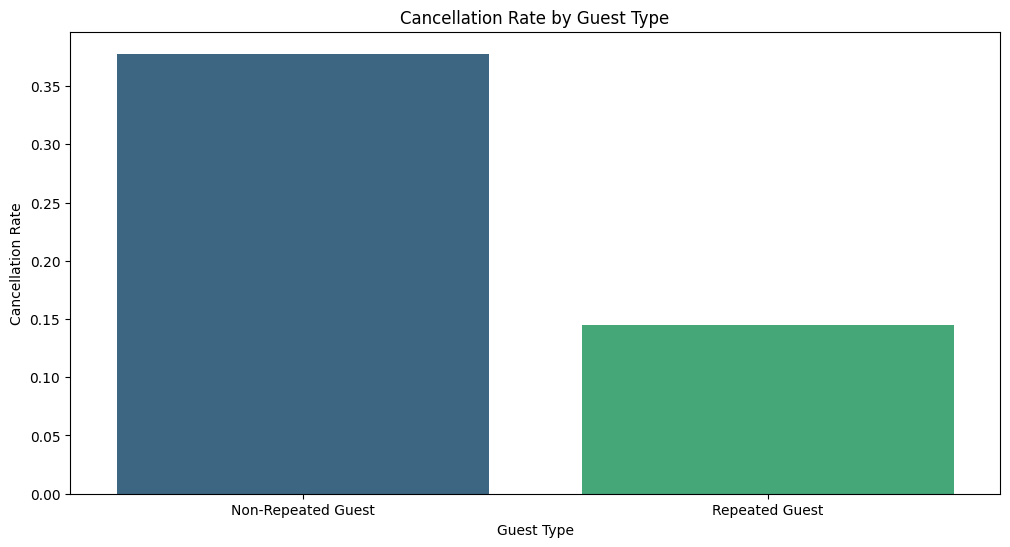

In [ ]:
#Cancellation Rate by Guest Type
# Calculate the cancellation rate by guest type
cancellation_rate = df.groupby('repeated_guest')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='repeated_guest', y='is_canceled', data=cancellation_rate, palette='viridis')
plt.title('Cancellation Rate by Guest Type')
plt.xlabel('Guest Type')
plt.ylabel('Cancellation Rate')
plt.show()

* **Market Segments:** Analyze different market segments (e.g., corporate vs. leisure).

In [ ]:
# Display unique market segments
market_segments = df['market_segment'].unique()
print(market_segments)

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
#Behavioral Analysis
# Calculate mean values for key features by market segment
behavioral_analysis = df.groupby('market_segment')[key_features].mean().reset_index()

# Print the behavioral analysis
print(behavioral_analysis)

  market_segment   lead_time         adr  stays_in_weekend_nights  \
0       Aviation    4.443038  100.142110                 1.092827   
1  Complementary   13.286676    2.886366                 0.351279   
2      Corporate   22.125590   69.358952                 0.438338   
3         Direct   49.859115  115.445175                 0.856180   
4         Groups  186.973096   79.479472                 0.788754   
5  Offline TA/TO  135.004459   87.354783                 1.053512   
6      Online TA   82.998725  117.197063                 0.991023   
7      Undefined    1.500000   15.000000                 0.500000   

   stays_in_week_nights  is_canceled  
0              2.514768     0.219409  
1              1.296097     0.130552  
2              1.654580     0.187347  
3              2.349595     0.153419  
4              2.203776     0.610620  
5              2.850365     0.343160  
6              2.582963     0.367211  
7              1.000000     1.000000  


<ipython-input-19-bf60955186a1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=cancellation_rate, palette='viridis')


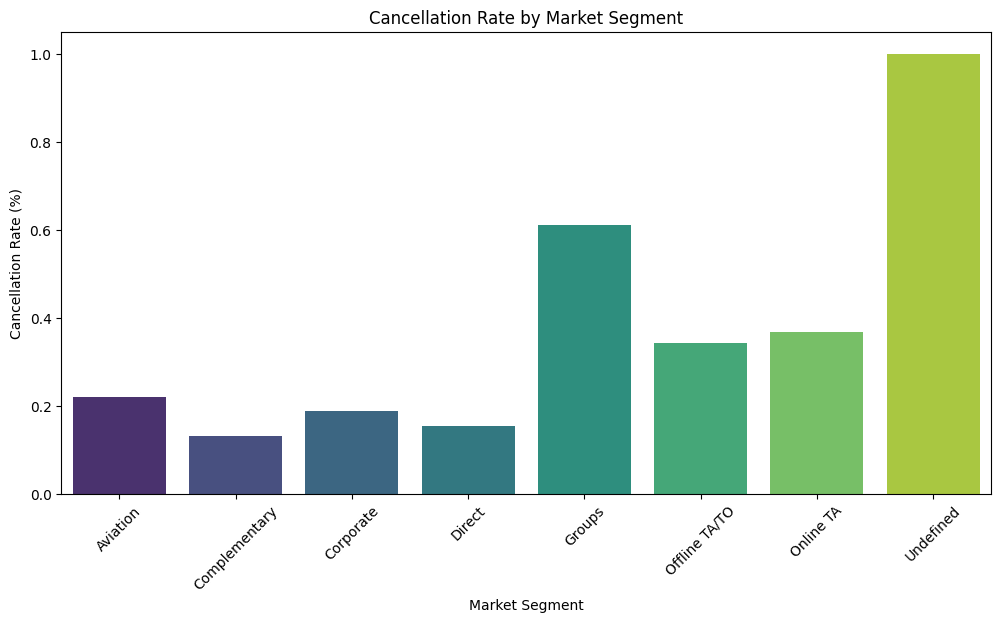

In [ ]:
# Cancellation Rate by Market Segment
# Calculate the cancellation rate by market segment
cancellation_rate = df.groupby('market_segment')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='is_canceled', data=cancellation_rate, palette='viridis')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

* **Customer Types:** Examine differences in behavior and revenue by customer types (e.g., transient, group).

In [ ]:
# Display unique customer types
customer_types = df['customer_type'].unique()
print(customer_types)

['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
#Behavioral Analysis
# Calculate mean values for key features by customer type
behavioral_analysis = df.groupby('customer_type')[key_features].mean().reset_index()

# Print the behavioral analysis
print(behavioral_analysis)

     customer_type   lead_time         adr  stays_in_weekend_nights  \
0         Contract  142.969823   87.549637                 1.469578   
1            Group   55.057192   83.488579                 0.824957   
2        Transient   93.295515  107.013621                 0.938815   
3  Transient-Party  137.037056   86.084253                 0.802022   

   stays_in_week_nights  is_canceled  
0              3.851079     0.309617  
1              2.057192     0.102253  
2              2.508330     0.407463  
3              2.262697     0.254299  


<ipython-input-22-8ea593ad299d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='is_canceled', data=cancellation_rate, palette='viridis')


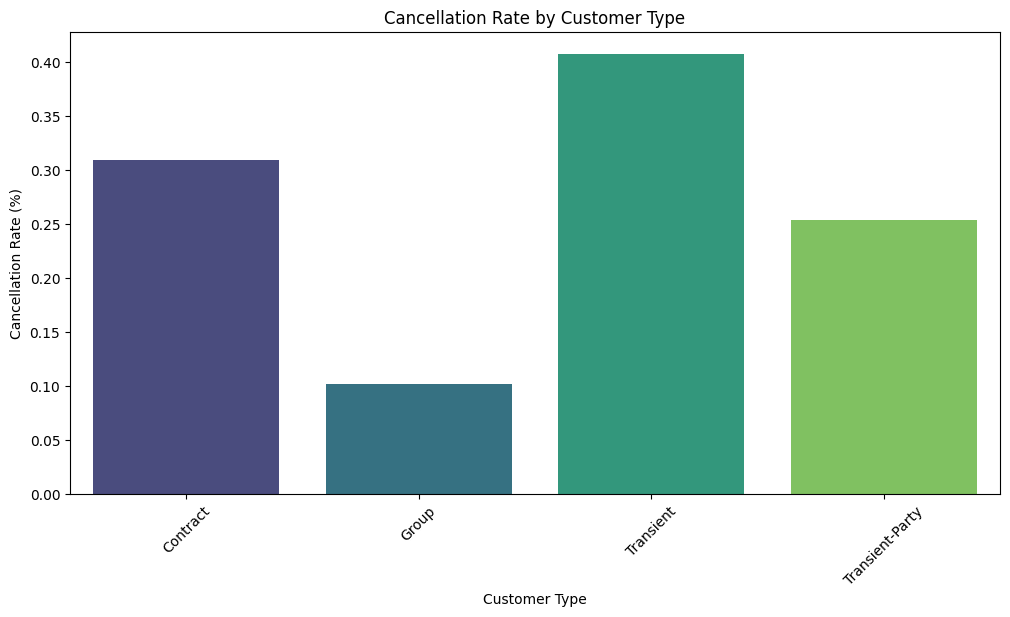

In [ ]:
#Cancellation Rate by Customer Type
# Calculate the cancellation rate by customer type
cancellation_rate = df.groupby('customer_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='is_canceled', data=cancellation_rate, palette='viridis')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

#5 Room Analysis

* **Room Types:** Compare booked room types versus assigned room types.

In [ ]:
# Display unique booked and assigned room types
booked_room_types = df['reserved_room_type'].unique()
assigned_room_types = df['assigned_room_type'].unique()
print("Booked Room Types:", booked_room_types)
print("Assigned Room Types:", assigned_room_types)

Booked Room Types: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Assigned Room Types: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [ ]:
# Frequency of booked room types
booked_room_freq = df['reserved_room_type'].value_counts().reset_index()
booked_room_freq.columns = ['Room Type', 'Booked Frequency']

# Frequency of assigned room types
assigned_room_freq = df['assigned_room_type'].value_counts().reset_index()
assigned_room_freq.columns = ['Room Type', 'Assigned Frequency']

# Merge the frequencies
room_type_comparison = pd.merge(booked_room_freq, assigned_room_freq, on='Room Type', how='outer').fillna(0)

# Print the comparison
print(room_type_comparison)

   Room Type  Booked Frequency  Assigned Frequency
0          A           85994.0               74053
1          D           19201.0               25322
2          E            6535.0                7806
3          F            2897.0                3751
4          G            2094.0                2553
5          B            1118.0                2163
6          C             932.0                2375
7          H             601.0                 712
8          P              12.0                  12
9          L               6.0                   1
10         I               0.0                 363
11         K               0.0                 279


In [ ]:
# Calculate mismatches
room_type_mismatch = df[df['reserved_room_type'] != df['assigned_room_type']].shape[0]
total_bookings = df.shape[0]
mismatch_percentage = (room_type_mismatch / total_bookings) * 100

# Print the mismatch percentage
print(f"Room Type Mismatch Percentage: {mismatch_percentage:.2f}%")

Room Type Mismatch Percentage: 12.49%


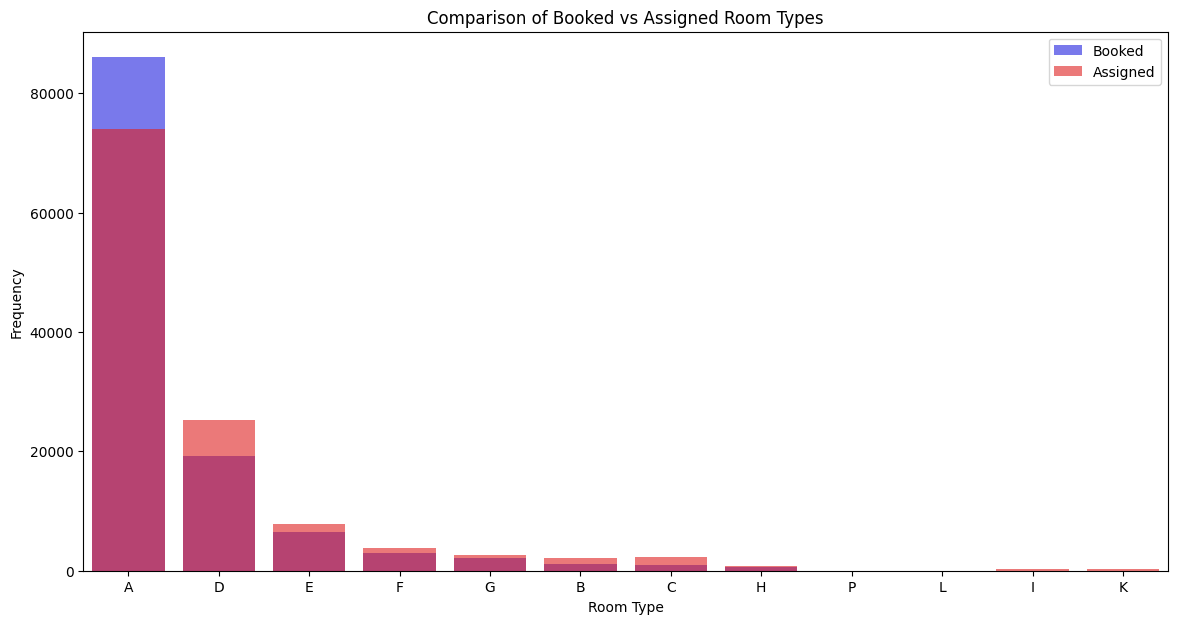

In [ ]:
# Bar plot for booked vs assigned room types
plt.figure(figsize=(14, 7))
sns.barplot(x='Room Type', y='Booked Frequency', data=room_type_comparison, color='blue', alpha=0.6, label='Booked')
sns.barplot(x='Room Type', y='Assigned Frequency', data=room_type_comparison, color='red', alpha=0.6, label='Assigned')
plt.title('Comparison of Booked vs Assigned Room Types')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.legend()
plt.show()

* **Booking Changes:** Analyze the impact of booking changes on cancellations and revenue.

In [ ]:
# Create a new column to indicate whether there were any booking changes
df['booking_changed'] = df['booking_changes'] > 0

In [ ]:
#Cancellation Analysis
# Cancellation rate for bookings with changes
with_changes_cancellation_rate = df[df['booking_changed']]['is_canceled'].mean()

# Cancellation rate for bookings without changes
without_changes_cancellation_rate = df[~df['booking_changed']]['is_canceled'].mean()

# Print the cancellation rates
print(f"Cancellation rate for bookings with changes: {with_changes_cancellation_rate:.2%}")
print(f"Cancellation rate for bookings without changes: {without_changes_cancellation_rate:.2%}")

Cancellation rate for bookings with changes: 15.67%
Cancellation rate for bookings without changes: 40.85%


<ipython-input-35-4728404154b8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Booking Change', y='Cancellation Rate', data=cancellation_df, palette='viridis')


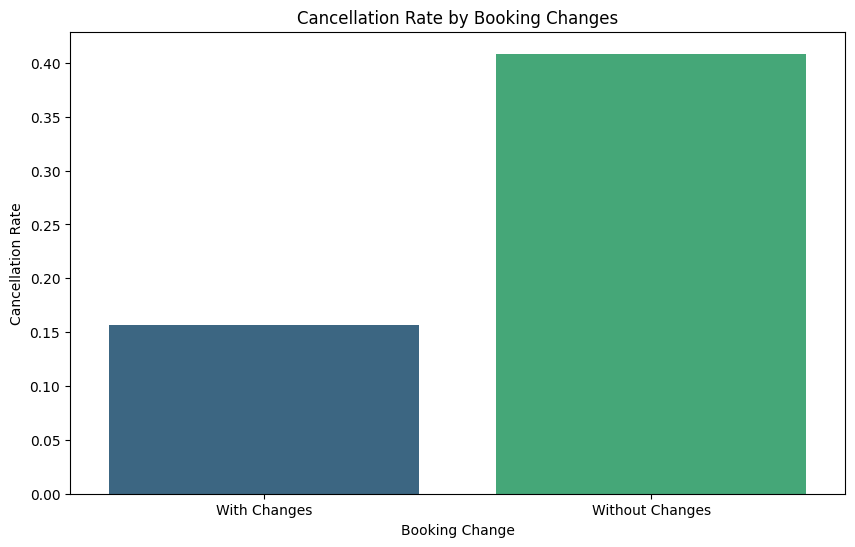

In [ ]:
#Bar Plot of Cancellation Rate by Booking Changes
# Data for the bar plot
cancellation_data = {
    'Booking Change': ['With Changes', 'Without Changes'],
    'Cancellation Rate': [with_changes_cancellation_rate, without_changes_cancellation_rate]
}
cancellation_df = pd.DataFrame(cancellation_data)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Change', y='Cancellation Rate', data=cancellation_df, palette='viridis')
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Change')
plt.ylabel('Cancellation Rate')
plt.show()


In [ ]:
# Average ADR for bookings with changes
with_changes_adr = df[df['booking_changed']]['adr'].mean()

# Average ADR for bookings without changes
without_changes_adr = df[~df['booking_changed']]['adr'].mean()

# Print the average ADR
print(f"Average ADR for bookings with changes: {with_changes_adr:.2f}")
print(f"Average ADR for bookings without changes: {without_changes_adr:.2f}")

Average ADR for bookings with changes: 104.42
Average ADR for bookings without changes: 101.37


#6  Agent Analysis

* **Agent Performance:** Evaluate the performance of different agents.

In [ ]:
# Number of bookings per agent
agent_bookings = df['agent'].value_counts().reset_index()
agent_bookings.columns = ['agent', 'number_of_bookings']

# Average lead time per agent
agent_lead_time = df.groupby('agent')['lead_time'].mean().reset_index()
agent_lead_time.columns = ['agent', 'average_lead_time']

# Cancellation rate per agent
agent_cancellation_rate = df.groupby('agent')['is_canceled'].mean().reset_index()
agent_cancellation_rate.columns = ['agent', 'cancellation_rate']

# Average ADR per agent
agent_adr = df.groupby('agent')['adr'].mean().reset_index()
agent_adr.columns = ['agent', 'average_adr']

# Merge the metrics into a single DataFrame
agent_performance = agent_bookings.merge(agent_lead_time, on='agent').merge(agent_cancellation_rate, on='agent').merge(agent_adr, on='agent')

# Print the agent performance metrics
agent_performance.head()

,agent,number_of_bookings,average_lead_time,cancellation_rate,average_adr
0,9.0,31961,85.893808,0.415006,122.542019
1,240.0,13922,84.701839,0.393909,116.143168
2,1.0,7191,243.931164,0.734251,71.494684
3,14.0,3640,69.668407,0.179121,125.584016
4,7.0,3539,70.780446,0.133936,95.751382


#7. Services

* **Car Parking:** Analyze the demand for car parking spaces.

In [ ]:
# Frequency of car parking spaces requested
car_parking_freq = df['required_car_parking_spaces'].value_counts().reset_index()
car_parking_freq.columns = ['Number of Car Parking Spaces', 'Frequency']
car_parking_freq.sort_values(by='Number of Car Parking Spaces', inplace=True)

# Print the frequency of car parking spaces requested
print(car_parking_freq)

   Number of Car Parking Spaces  Frequency
0                             0     111974
1                             1       7383
2                             2         28
3                             3          3
4                             8          2


#8. Correlation Analysis

* **Feature Correlations:** Calculate correlations between different features to identify significant relationships.

In [ ]:
# Exclude non-numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['number'])

In [ ]:
df_numeric.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1


In [ ]:
df_numeric= df_numeric.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis=1)

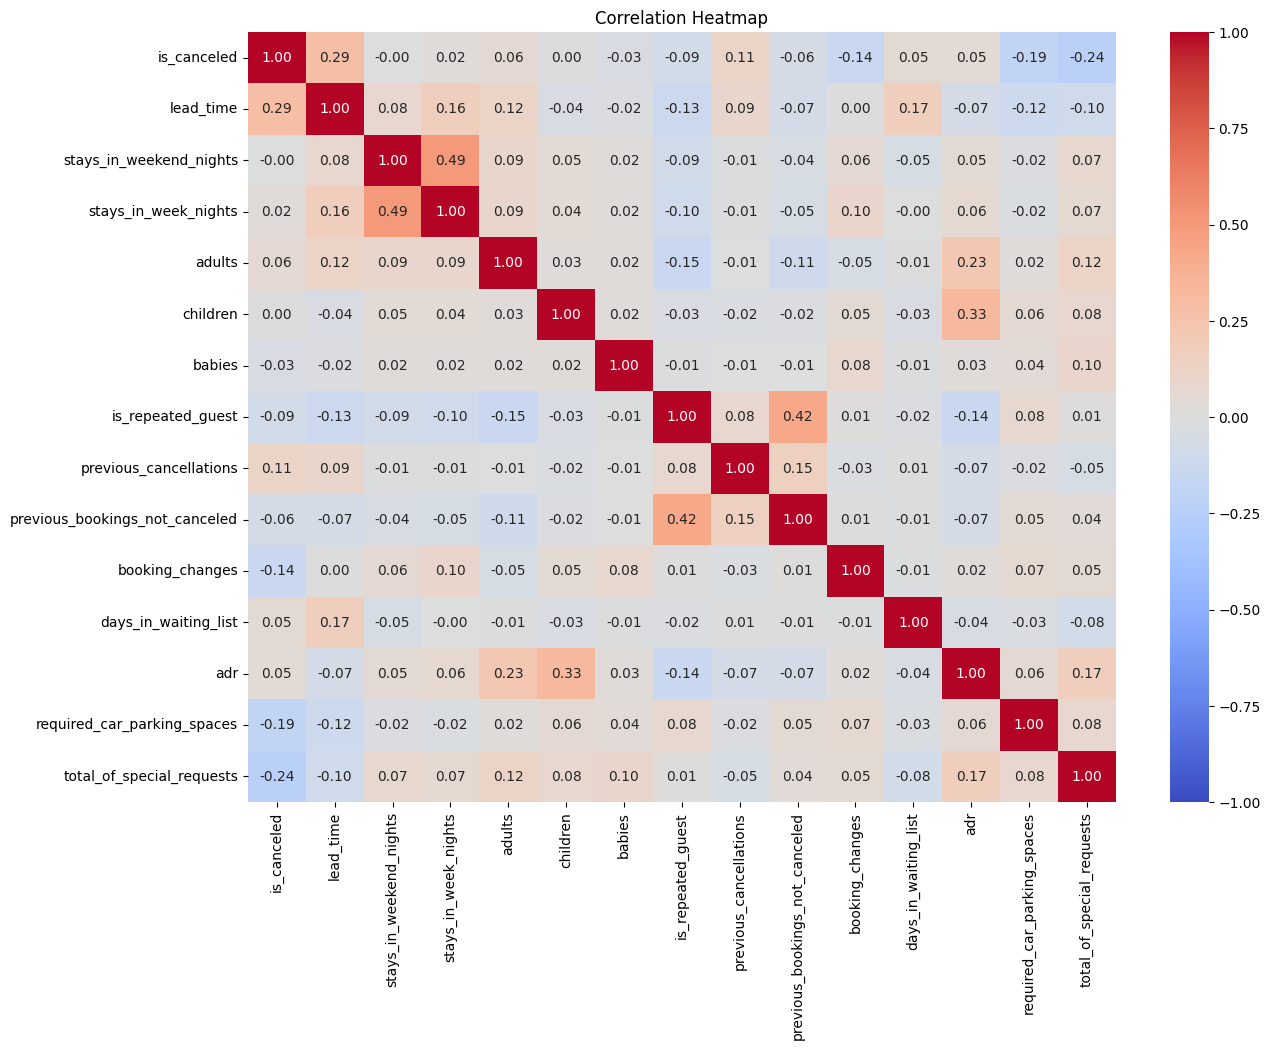

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set the size of the plot
plt.figure(figsize=(14, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

#9. Predictive Modeling

* **Cancellation Prediction:** Build a model to predict the likelihood of a booking being canceled.

* **Revenue Prediction:** Develop a model to forecast revenue based on booking characteristics.